In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#add other imports as needed

In [2]:
import os

In [3]:
import platform

# Set file location based on platform. 
platstring = platform.platform()
if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/TReND2024/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on Code Ocean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/TReND2024/"

Use the code block below to access the Two-Photon Calcium Imaging data set.  This is what we used in the tutorials.

In [4]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = os.path.join(data_root,'allen-brain-observatory/visual-coding-2p/manifest.json')

boc = BrainObservatoryCache(manifest_file=manifest_file)

Use code below to access Neuropixels data set.  This is electrophysiological data.  It is very similar to the data set we demonstrated, but has important differences, both in the science and in the access methods used in the python tools.

In [6]:
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

manifest_path = os.path.join(data_root,'allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json') 

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [10]:
cell_id = 517425536
sessions= boc.get_ophys_experiments(cell_specimen_ids =[cell_id], stimuli=['static_gratings'])
len(sessions)

1

In [11]:
sessions

[{'id': 502254330,
  'imaging_depth': 175,
  'targeted_structure': 'VISpm',
  'cre_line': 'Cux2-CreERT2',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'acquisition_age_days': 94,
  'experiment_container_id': 511510753,
  'session_type': 'three_session_B',
  'donor_name': '225036',
  'specimen_name': 'Cux2-CreERT2;Camk2a-tTA;Ai93-225036',
  'fail_eye_tracking': True}]

In [15]:
cell_index = data_set.get_cell_specimen_indices([cell_id])

cell_index

[55]

In [13]:
data_set

In [12]:
data_set=boc.get_ophys_experiment_data(sessions[0])

In [16]:
timestamps, dff = data_set.get_dff_traces() # get cell responses in the dataset

In [17]:
timestamps

array([  25.43446,   25.46771,   25.50096, ..., 3811.27209, 3811.30535,
       3811.3386 ])

In [23]:
stim_table = data_set.get_stimulus_table("static_gratings")
# remove blank screen readings
stim_table = stim_table[stim_table["orientation"].isna() == False]

stim_table.head()

,orientation,spatial_frequency,phase,start,end
0,150.0,0.02,0.75,747,754
2,0.0,0.16,0.25,762,769
3,30.0,0.16,0.25,769,776
4,0.0,0.16,0.00,777,784
5,150.0,0.02,0.75,784,791


In [24]:
stim_table.shape

(5811, 5)

In [25]:
# get stimulus epochs
stim_epochs = data_set.get_stimulus_epoch_table()
stim_epochs

,stimulus,start,end
0,static_gratings,747,15193
1,natural_scenes,16096,30550
2,spontaneous,30700,39581
3,natural_scenes,39582,54029
4,static_gratings,54933,69378
5,natural_movie_one,70282,79312
6,natural_scenes,80215,96092
7,static_gratings,97372,113624


In [33]:
dff.shape

(90, 113850)

In [31]:
timestamps.shape

(113850,)

Text(0, 0.5, 'DFF (%)')

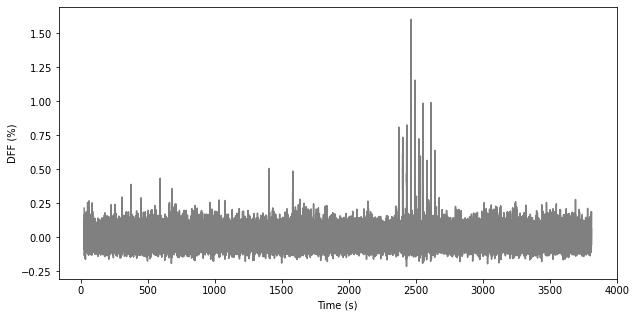

In [38]:
fig = plt.figure(figsize=(10,5))
plt.plot(timestamps, dff[1,:], color='gray')
plt.xlabel("Time (s)")
plt.ylabel("DFF (%)")